In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv("intrusion_detection/data_lower.csv")
k = 5
# url="https://raw.githubusercontent.com/VatsalSoni301/pca_kmean_gmm/master/PCA/intrusion_detection/data_lower.csv"
# s=requests.get(url).content
# df=pd.read_csv(io.StringIO(s.decode('utf-8')))
# print(df)

In [23]:
Y = []
for i in df['xAttack']:
    if i=="normal":
        Y.append(0)
    elif i=="dos":
        Y.append(1)
    elif i=="r2l":
        Y.append(2)
    elif i=="probe":
        Y.append(3)
    elif i=="u2r":
        Y.append(4)
Y = np.array(Y)
Y = Y[0:10000]

In [24]:
X = df.iloc[0:10000,0:14].values
# X = df.iloc[:,0:14].values

In [25]:
cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')  
labels = cluster.fit_predict(X)  

In [26]:
cont = contingency_matrix(labels,Y)

In [27]:
ans = 0
for i in cont:
    ans = ans + max(i)
purity = ans/len(df)
purity

0.04201694013796607

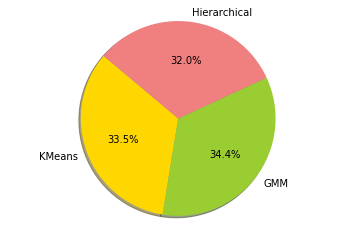

In [31]:
labels =  'KMeans', 'GMM', 'Hierarchical',
sizes = [83.86241496193628, 86.10892810364126, 80]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()